### tf.datasets:
1. `tfds.list_builders():` will return all avaiable datasets.All dataset builders are subclass of `tfds.core.DatasetBuilder`.
2. `tfds.load(name, split=None, shuffle_files=False, data_dir=None, download=True, with_info=False, as_supervised=True):` Will load the specific dataset.
    - `name:` name of the dataset.
    - `split=['train', 'test', 'validation']:` split 
    - `suffle_files = True:` Control whether to shuffle the files between each epoch.
    - `data_dir=None:`  Location where the dataset is saved.
    - `with_info:`Returns the tfds.core.DatasetInfo containing dataset metadata.
    - `as_supervised=True:` if true it will return tupple else will return dictionary.
3. `tfds.show_examples(ds, info):`returns a matplotlib.figure.Figure.
4. `tf.data.Dataset.map():`
5. `tf.data.Dataset.cache():` As you fit the dataset in memory, cache it before shuffling for a better performance.
6. `tf.data.Dataset.batch():` Batch elements of the dataset after shuffling to get unique batches at each epoch.
7. `tf.data.Dataset.prefetch():` end the pipeline by prefetching for performance.
8. `tf.data.Dataset.shuffle():`set the shuffle buffer to the full dataset size. For large datasets that can't fit in memory, use `buffer_size=1000` if your system allows it.

In [4]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot
import tensorflow_datasets as tfds

layers = keras.layers
regularizers = keras.regularizers

#HYPERPARAMETERS
BATCH_SIZE = 32
WEIGHT_DECAY = 0.001
LEARNING_RATE = 0.001

In [26]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    with_info=True,
    as_supervised=True,
    shuffle_files=True,
)

In [27]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\libd7\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

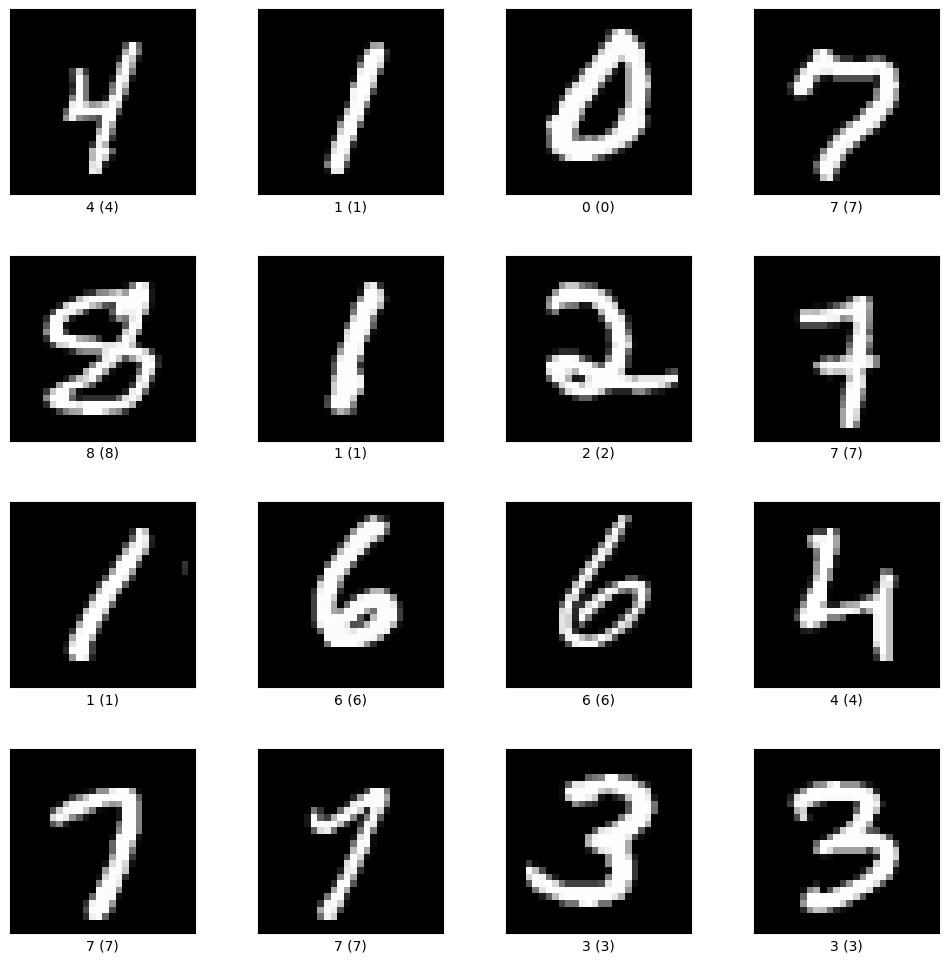

In [28]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

In [29]:
def normalize_image(image, label):
    return tf.cast(image, tf.float32)/255.0, label

In [30]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(normalize_image, num_parallel_calls= AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(BATCH_SIZE) #
ds_train = ds_train.prefetch(AUTOTUNE) #

ds_test = ds_test.map(normalize_image, num_parallel_calls= AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)


In [31]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28,1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(10),
])
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics='accuracy'
)

model.fit(ds_train, epochs=5, verbose =2 )

Epoch 1/5
1875/1875 - 24s - loss: 0.1698 - accuracy: 0.9510 - 24s/epoch - 13ms/step
Epoch 2/5
1875/1875 - 16s - loss: 0.0671 - accuracy: 0.9804 - 16s/epoch - 9ms/step
Epoch 3/5
1875/1875 - 19s - loss: 0.0471 - accuracy: 0.9859 - 19s/epoch - 10ms/step
Epoch 4/5
1875/1875 - 19s - loss: 0.0358 - accuracy: 0.9889 - 19s/epoch - 10ms/step
Epoch 5/5
1875/1875 - 19s - loss: 0.0270 - accuracy: 0.9915 - 19s/epoch - 10ms/step


In [32]:
model.evaluate(ds_test, verbose =2 )

79/79 - 3s - loss: 0.0692 - accuracy: 0.9807 - 3s/epoch - 40ms/step


[0.06924717873334885, 0.9807000160217285]